In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = open('/home/dy/filerepo/Research/multiagent-human-experiment/mturk/experiment_data/mturk-experiment-4-20210826.json')
  
data = json.load(f)
  
f.close()

In [4]:
agents = [game[1] for game in data[0]['results']['data'][-1]['games']]
print(agents)

['sac_self_play_coordination_ring_0', 'nct_coordination_ring', 'action_cml_v_sac_none_no_ib', 'sac_v_bc_states_coordination_ring_0']


In [5]:
# agents = ['bc_simple', 'nct_simple', 'action_cml_simple', 'sac_self_play_simple_0']
feedback_subtasks = [5, 7, 9, 11]
game_subtasks = [4, 6, 8, 10]
workers = range(len(data))

In [13]:
all_data = pd.DataFrame()
df = pd.DataFrame()


responses = []
for worker in workers:
    for agent in agents:
        for game_subtask in game_subtasks: #find the right subtask for the agent order
            # if (data[worker]['results']['data'][game_subtask]['data']['trajectory'][0]['player_1_id'] == agent):
            if (data[worker]['results']['data'][game_subtask]['params']['playerOne'] == agent):
                game_info = data[worker]['results']['data'][game_subtask+1]
                game_info['agent'] = agent
                game_info['workerId'] = data[worker]['workerId']
                responses.append(data[worker]['results']['data'][game_subtask+1])

df = pd.DataFrame.from_dict(responses)


In [14]:
df

,helpful,competent,enjoy,humanlike,efficient,flexible,predictable,partnerFeedback,agent,workerId
0,5,4,5,4,5,4,5,good,sac_self_play_coordination_ring_0,A1JWF4WXGEXQKU
1,4,5,4,5,4,5,4,good,nct_coordination_ring,A1JWF4WXGEXQKU
2,5,4,5,5,4,5,4,good,action_cml_v_sac_none_no_ib,A1JWF4WXGEXQKU
3,4,5,4,5,4,5,5,Good,sac_v_bc_states_coordination_ring_0,A1JWF4WXGEXQKU
4,6,6,5,3,5,5,2,,sac_self_play_coordination_ring_0,AGSSG1SWNWGHD
...,...,...,...,...,...,...,...,...,...,...
75,6,5,6,7,6,5,6,My partner was sensitive,sac_v_bc_states_coordination_ring_0,A2AKJ3UD69QC5K
76,6,5,5,5,5,4,4,Got a little confused when we needed to plate ...,sac_self_play_coordination_ring_0,A2SR85I8JMO1ZZ
77,7,7,7,7,7,7,7,None at all,nct_coordination_ring,A2SR85I8JMO1ZZ
78,6,6,6,7,6,7,7,None at all,action_cml_v_sac_none_no_ib,A2SR85I8JMO1ZZ


In [26]:
def get_subtask(agent, worker, game_subtasks, data):

    for game_subtask in game_subtasks: #find the right subtask for the agent order
        # if (data[worker]['results']['data'][game_subtask]['data']['trajectory'][0]['player_1_id'] == agent):
        if (data[worker]['results']['data'][game_subtask]['params']['playerOne'] == agent):
            return game_subtask
    return -1

In [27]:
def get_reward(worker, game_subtask, data):
    game_id = data[worker]['results']['data'][game_subtask]['trial_id']

    f = open('/home/dy/filerepo/Research/multiagent-human-experiment/server/data/server/' + game_id + '.json')
    game_data = json.load(f)    
    f.close()

    total_reward = 0

    # for timestep in data[worker]['results']['data'][game_subtask]['data']['trajectory']:
    for timestep in game_data['trajectory']:
        total_reward += timestep['reward']

    return total_reward

In [28]:
score_data = pd.DataFrame()

all_scores = []
for worker in workers:
    scores_dict = {}
    for agent in agents:
        game_subtask = get_subtask(agent, worker, game_subtasks, data)
        reward = get_reward(worker, game_subtask, data)
        scores_dict[agent] = reward
        print(worker, agent, reward)
    all_scores.append(scores_dict)




0 sac_self_play_coordination_ring_0 0
0 nct_coordination_ring 2
0 action_cml_v_sac_none_no_ib 0
0 sac_v_bc_states_coordination_ring_0 0
1 sac_self_play_coordination_ring_0 6
1 nct_coordination_ring 7
1 action_cml_v_sac_none_no_ib 6
1 sac_v_bc_states_coordination_ring_0 9
2 sac_self_play_coordination_ring_0 6
2 nct_coordination_ring 8
2 action_cml_v_sac_none_no_ib 6
2 sac_v_bc_states_coordination_ring_0 5
3 sac_self_play_coordination_ring_0 3
3 nct_coordination_ring 5
3 action_cml_v_sac_none_no_ib 3
3 sac_v_bc_states_coordination_ring_0 4
4 sac_self_play_coordination_ring_0 1
4 nct_coordination_ring 2
4 action_cml_v_sac_none_no_ib 2
4 sac_v_bc_states_coordination_ring_0 3
5 sac_self_play_coordination_ring_0 1
5 nct_coordination_ring 3
5 action_cml_v_sac_none_no_ib 0
5 sac_v_bc_states_coordination_ring_0 2
6 sac_self_play_coordination_ring_0 0
6 nct_coordination_ring 2
6 action_cml_v_sac_none_no_ib 0
6 sac_v_bc_states_coordination_ring_0 0
7 sac_self_play_coordination_ring_0 2
7 nct_coor

In [29]:
scores_df = pd.DataFrame(all_scores)

In [30]:
scores_df

,sac_self_play_coordination_ring_0,nct_coordination_ring,action_cml_v_sac_none_no_ib,sac_v_bc_states_coordination_ring_0
0,0,2,0,0
1,6,7,6,9
2,6,8,6,5
3,3,5,3,4
4,1,2,2,3
5,1,3,0,2
6,0,2,0,0
7,2,3,2,2
8,4,7,7,7
9,1,2,2,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f9e620490>,
      dtype=object)

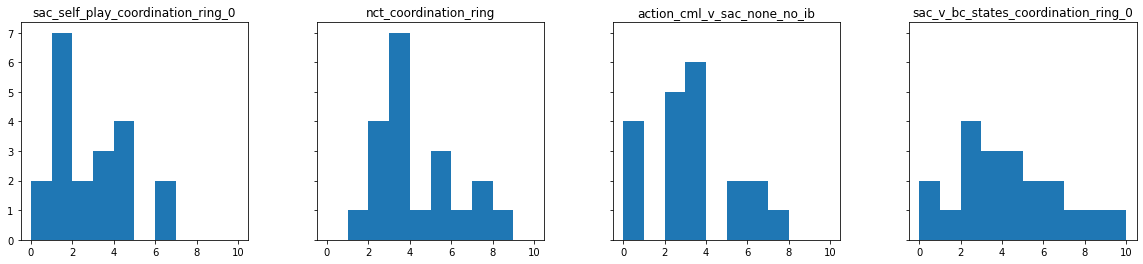

In [31]:
scores_df.hist(layout=(1,4), figsize=(20,4), sharey=True, sharex=True, grid=False, bins=range(11))

In [44]:
metrics = pd.DataFrame({'mean': scores_df.mean(), 'median': scores_df.median(), 'std': scores_df.std()})

In [45]:
metrics

,mean,median,std
sac_self_play_coordination_ring_0,2.40,2.0,1.818038
nct_coordination_ring,3.85,3.0,1.954078
action_cml_v_sac_none_no_ib,2.85,3.0,2.084403
sac_v_bc_states_coordination_ring_0,3.80,3.5,2.504732


In [41]:
scores_df.median()

sac_self_play_coordination_ring_0      2.0
nct_coordination_ring                  3.0
action_cml_v_sac_none_no_ib            3.0
sac_v_bc_states_coordination_ring_0    3.5
dtype: float64

In [34]:
scores_df.std()

sac_self_play_coordination_ring_0      1.818038
nct_coordination_ring                  1.954078
action_cml_v_sac_none_no_ib            2.084403
sac_v_bc_states_coordination_ring_0    2.504732
dtype: float64